In [32]:
%matplotlib inline
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

import scipy as sp
import numpy as np
import pickle

import seaborn as sns
from IPython.display import Image

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

import itertools

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', None)

<h3>Load Data</h3>
We will use previously transformed data from the last notebook 'LeadScoring_DataPrepping.ipynb'

<p>Data files used:

<li><b>pca_features_X.npy</b> - PCA transformed feature set
<li><b>raw_features_X.npy</b>  - raw untransformed featureset
<li><b>targetdata.npy</b>  - target variable

<li><b>PCA_weights.csv</b> - pca output of principal components and original features

In [33]:
pca_X = np.load('pca_features_X.npy')
X = np.load('raw_features_X.npy')
Y = np.load('targetdata.npy')

pca_weights = pd.read_csv('PCA_weights.csv', index_col=False)

In [35]:
pca_weights.head()

,index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
0,affiliate_touch,-0.001050,-0.148780,-0.115610,-0.125987,-0.127985,0.176867,-0.071505,0.408875,0.061175,0.072378,0.038637,-0.038081,0.155960,-0.068785,-0.039437,0.002518,-0.027693,-0.002160,-0.049076,0.072252,0.024943,0.003237,0.062220,-0.040354,0.090836,-0.004399,0.007927,-0.187936,-0.479473,0.151325,0.032946,0.171282,0.003193,-0.008952,0.022713,0.074102,-0.057355,0.032599,-0.051067,0.076287,-0.076645,-0.073184,0.128086,0.068138,0.058669,0.214558,-0.031421,0.027918,0.015831,-0.020018,-0.017018,0.016169,-0.140132,0.033705,0.075948,0.017409,0.037250,-0.028946,-0.057422,-0.018747,0.029998,0.048407,-0.011580,-0.035469,-0.083591,0.090997,0.344688,-0.061582,-0.002763,-0.037991,-0.001150,-0.063626,0.010104,0.028824,-0.011681,-0.004509,-0.069428,0.121189,-0.033702,-0.097885,0.013228,0.029414,0.012737,0.016139,0.007328,-0.011510,0.047226,-0.054036,-0.053103,0.016072,0.053288,-0.019032,0.043757,0.020525,0.034267,-0.017911,-0.000148,-0.016042,0.016976,0.045488,-4.409393e-04,0.014284,-0.002283,-0.009456,0.005374,0.004738,-0.019440,-0.008194,0.020694,0.008189,0.000591,-0.034873,0.006528,-0.011830,0.002539,-0.002577,0.000568,-0.003972,-0.005910,-0.011699,0.004811,0.001617,0.008001,0.006497,-0.002671,-0.002551,0.002150,-0.001507,0.004132,0.003441,0.003779,0.004518,0.009856,0.004119,0.001213,0.001647,0.000314,-0.003267,-0.004440,0.001070,-0.001262,0.001481,0.000321,0.004930,-0.001087,0.006743,0.002691,-0.003679,-0.001173,0.002599,0.000907,0.002158,-0.001510,-0.005145,0.005710,-0.003596,-0.005004,0.010266,-0.002704,0.001708,-0.002270,0.000578,0.000201,-0.002374,-0.000450,-0.001731,0.003304,-0.001369,-0.001185,0.004847,-0.006340,-0.001877,0.001097,-0.000175,0.001976,-0.000657,0.002668,0.005784,-0.000541,0.005246,-0.000632,-0.001314,0.009700,-0.005533,-0.008088,-0.007245,0.010015,0.003923,0.013500,-0.009655,0.002223,-0.003190,0.006396,-0.005524,0.001721,0.006436,0.000915,0.000775,0.004966,0.002684
1,Have_products,0.000049,-0.000996,-0.006292,0.003080,0.005961,-0.005566,-0.003709,0.002624,-0.005846,-0.000379,-0.000515,0.003166,0.003657,0.015599,0.012978,0.002233,0.014675,-0.007027,-0.054125,-0.003041,-0.104681,-0.111607,-0.018031,-0.030898,-0.009713,-0.015043,0.040490,0.010750,-0.005253,0.002621,0.002420,-0.013000,-0.002128,-0.009853,0.000800,0.003982,0.000902,-0.005186,-0.010544,-0.023043,-0.003446,-0.023791,0.009997,-0.001381,0.009679,0.003086,-0.008065,-0.005235,0.022980,0.003206,-0.015963,0.021332,-0.026431,0.016726,-0.011500,-0.004262,0.011854,-0.047819,0.003370,-0.006062,-0.044257,-0.038512,-0.007042,-0.002225,-0.017698,-0.024048,-0.013083,0.007874,-0.075181,0.024535,0.000381,0.035223,-0.112122,-0.036533,0.035853,-0.007066,0.714704,0.562254,0.098098,0.104684,-0.145665,0.106552,0.180254,-0.054441,0.030587,0.020552,-0.023894,-0.028832,0.029474,0.051278,-0.010950,0.016195,-0.014087,0.006516,0.045697,-0.011078,0.004811,0.005862,-0.000509,0.028320,1.279336e-02,-0.008519,0.044047,0.018183,-0.000142,-0.009260,-0.015236,0.011686,-0.003048,-0.015444,0.013110,-0.004396,0.000386,0.002085,-0.020579,0.009605,0.000439,-0.006450,-0.001231,-0.009500,-0.003893,-0.011431,0.004765,0.027740,0.007853,-0.006554,-0.008717,-0.008758,0.002460,-0.000047,0.001398,-0.008023,-0.002515,0.000538,-0.006915,-0.001874,0.003946,0.005781,-0.002571,0.004583,0.007334,-0.001955,-0.018597,0.012

In [36]:
X_train, X_test, y_train, y_test = train_test_split(pca_X, Y, test_size = 0.4, random_state = 4)

produce a more balanced dataset

In [57]:
shuffle_index = np.random.choice(len(X_train), len(X_train))[:]

In [97]:
Y_shuffle = y_train[shuffle_index]
X_shuffle = X_train[shuffle_index]

In [98]:
converted_index = np.where(Y_shuffle[:] ==1)

In [99]:
len(converted_index[0])

1342

In [100]:
unconverted_index = np.where(Y_shuffle[:] == -1)

In [106]:
new_index = np.concatenate((unconverted_index[0][:4000], converted_index[0]))

In [107]:
np.random.shuffle(new_index)

In [108]:
Y_shuffle[new_index]

array([-1,  1,  1, ..., -1, -1, -1], dtype=int64)

Fit model on regular dataset

In [37]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
cv_score = cross_val_score(lr, X_train, y_train, cv=10)

In [39]:
cv_score.mean()

0.92612173785014051

In [40]:
y_train[np.where(y_train[:] == 1)].sum()

1351

In [41]:
y_train[np.where(y_train[:] == 1)].sum()*1.0/len(y_train)

0.082418252806246955

In [46]:
Y_hat = lr.predict(X_train)

In [48]:
Y_hat[np.where(Y_hat[:]==1)].sum()

410

In [49]:
y_train[np.where(y_train[:]==1)].sum()

1351

Fit model on balanced dataset

In [119]:
lr_balanced = LogisticRegression()
lr_balanced.fit(X_shuffle[new_index], Y_shuffle[new_index])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [120]:
cv_score = cross_val_score(lr_balanced,X_shuffle[new_index], Y_shuffle[new_index], cv=10)

In [121]:
cv_score.mean()

0.82366306136021561

In [122]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[14923   118]
 [ 1059   292]]
Normalized confusion matrix
[[ 0.99  0.01]
 [ 0.78  0.22]]


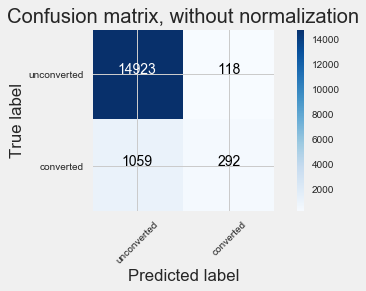

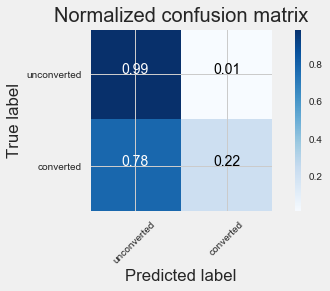

In [44]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_train, lr.predict(X_train))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
f1 = plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['unconverted', 'converted'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
f2 = plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['unconverted', 'converted'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()
f1.savefig('logreg_confusion_matrix_total.png')
f2.savefig('logreg_confusion_matrix_norm.png')

Confusion matrix, without normalization
[[3749  251]
 [ 612  730]]
Normalized confusion matrix
[[ 0.94  0.06]
 [ 0.46  0.54]]


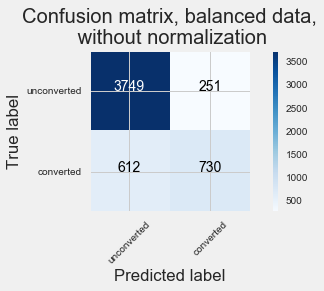

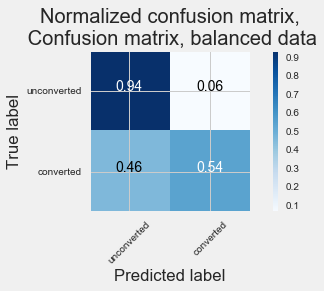

In [123]:
# Compute confusion matrix
cnf_matrix = confusion_matrix( Y_shuffle[new_index], lr_balanced.predict(X_shuffle[new_index]))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
f1 = plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['unconverted', 'converted'],
                      title='Confusion matrix, balanced data,\n without normalization')

# Plot normalized confusion matrix
f2 = plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['unconverted', 'converted'], normalize=True,
                      title='Normalized confusion matrix,\n Confusion matrix, balanced data')

plt.show()
f1.savefig('logreg_confusion_matrix_total_balance.png')
f2.savefig('logreg_confusion_matrix_norm_balance.png')